# TASK 3

<h3>Made By : Vandit Manish Jain</h3>

<p><b>
Problem Statement:
From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.
    </b></p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(r"C:\Users\Vandit Jain\OneDrive\Desktop\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<p><b><i>No null values found</i></b></p>

In [7]:
#count of the different categories in species
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

<h3>Visualize the data</h3>

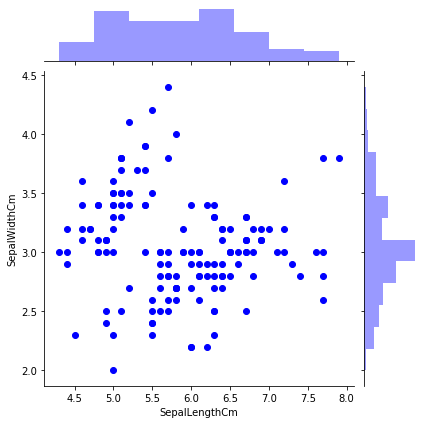

In [11]:
#plot between sepal length and width
sns.jointplot(x="SepalLengthCm",y="SepalWidthCm",data=df,kind="scatter",color="b", height=6)

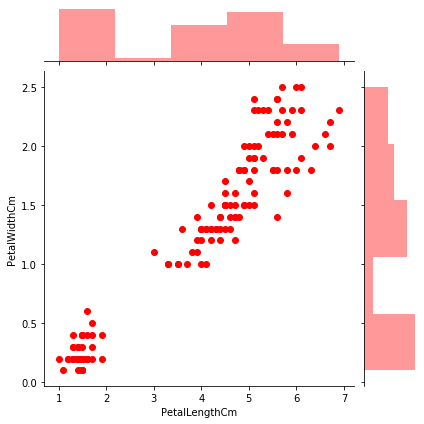

In [12]:
#plot between petal length and width
sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=df,kind="scatter",color="r", height=6)

<h3>Elbow Method</h3>

In [13]:
# Calulating the value of Within cluster sum of squares(sse)
X = df.drop(labels=["Species"], axis=1).values
sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300)
    km.fit(X)
    sse.append(km.inertia_)
print(sse)

[281918.32440000004, 70616.29893333334, 31326.8868, 17780.473968705548, 11441.17861957731, 7957.359060479375, 5900.853809147375, 4568.007740183793, 3631.9571052631577, 2959.520886904762]


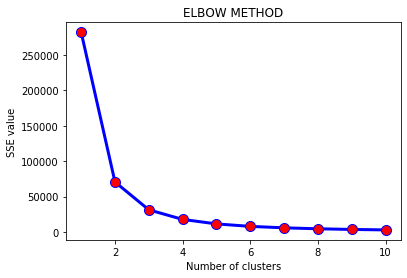

In [15]:
# Plotting the results of the elbow method
plt.plot(range(1,11),sse,color="blue",linestyle="solid", linewidth="3", marker="o" , markerfacecolor="red", markersize=10)
plt.title("ELBOW METHOD")
plt.xlabel("Number of clusters")
plt.ylabel("SSE value")
plt.show();

The optimum clusters is where the elbow occurs. This is when the sum of squares within clusters doesn't decrease significantly with every iteration. Let's take the optimum number of clusters 3.

<h3>Applying K-means Clustering</h3>

In [16]:
km = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300)
y_pred = km.fit_predict(X)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<h3>Visualizing the Clusters</h3>

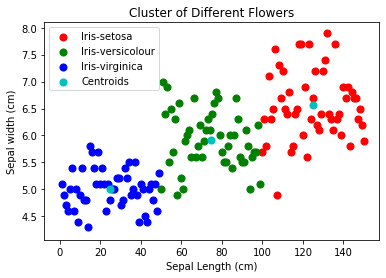

In [19]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=50, c='r', label='Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=50, c='g', label='Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=50, c='b', label='Iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 50, c = 'c', label = 'Centroids')
plt.title("Cluster of Different Flowers")
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()